<a href="https://colab.research.google.com/github/AryamaSinghParihar/3D_interactive_well_path_plotting/blob/main/Welly_location_data_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Welly location 3D interactive data plotting
Loading and analysing data from .las file and .csv data file. Creating a well path using the location module of the welly library and displaying it on a 3d interactive plot using matplotlib.

What is welly? Welly is a python library, developed by Agile-Geoscience is a great tool for loading, analyzing and visualisation of well log data.

There are multiple depth references used to denote a position along the wellbore -

True Vertical Depth (TVD) is measured vertically from the surface down to a certain target down hole
Measured Depth (MD) is the total length of the wellbore measured along the actual well path.
Depth is one of the most important logging measurements that is acquired along the wellbore as it allows for the successful completion of the well, setting of packers casing and deciding perforation intervals.

For a vertical well both TVD and MVD are equal. But as the well becomes deviated that TVD becomes smaller than the MVD.
Data source - [Welkom bij NLOG](https://www.nlog.nl/)


The welly library allows us to load a csv file and attach it to a welly well object and from that we can generate multiple plots such as our 2D map view of our x, y location and how our y location varies with tvd and generate interactive 3D plots of the well.



In [96]:
#installing welly library
!pip install wellpathpy
!pip install welly

In [97]:
from welly import Well
from welly import Curve
from welly import Location

import pandas as pd
import matplotlib.pyplot as plt

In [98]:
#loading in our file using mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
#uploading data from las file
well = Well.from_las('/content/drive/My Drive/Well_location_visualisation/L05-15-Spliced.las')

In [100]:
well
# by calling well object that we created we can get a summary of the well
# The Noble Piet van Ede rig(IMO: 8752805, Port of Registry: Monrovia, Liberia) is a three-legged cantilever jack-up drilling unit of 55 meters long and 62 meters wide, rated for water depths up to 64 meters with a maximum drilling depth of 7,620 meter.

Well(uwi: '', name: 'L5-15', 26 curves: ['BHT', 'CAL', 'CHT', 'CN', 'CNC', 'CNCQH', 'CNQH', 'DEPTH', 'GR', 'MBVI', 'MBVM', 'MCBW', 'MPHE', 'MPHS', 'MPRM', 'PEQH', 'PORZ', 'PORZC', 'TEN', 'TTEN', 'WTBH', 'ZCORQH', 'ZDEN', 'ZDENQH', 'ZDNC', 'ZDNCQH'])

In [101]:

well.header

,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS log ASCII Standard -VERSION 2.00,Version
1,WRAP,WRAP,,NO,One line per frame,Version
2,STRT,STRT,M,2772.75,Starting Depth,Well
3,STOP,STOP,M,2907.625,Ending Depth,Well
4,STEP,STEP,M,0.125,Level Spacing,Well
...,...,...,...,...,...,...
121,LUL,LUL:2,,DEN HELDER,Logging Unit Location,Parameter
122,ENGI,ENGI:2,,A. WIEFKERS/M. HEKEL,Engineer's Name,Parameter
123,WITN,WITN:2,,P. GERRITSEN,Witness' Name,Parameter
124,APIN,APIN,,,API Serial Number,Parameter


In [102]:
well.count_curves()

26

In [103]:
well._get_curve_mnemonics()
# to get all the curve names and their respective mnemonics

['BHT',
 'CAL',
 'CHT',
 'CN',
 'CNC',
 'CNCQH',
 'CNQH',
 'DEPTH',
 'GR',
 'MBVI',
 'MBVM',
 'MCBW',
 'MPHE',
 'MPHS',
 'MPRM',
 'PEQH',
 'PORZ',
 'PORZC',
 'TEN',
 'TTEN',
 'WTBH',
 'ZCORQH',
 'ZDEN',
 'ZDENQH',
 'ZDNC',
 'ZDNCQH']

In [104]:
well.data['GR']
# To get the description of a particular curve

/usr/local/lib/python3.10/dist-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
/usr/local/lib/python3.10/dist-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


Curve(mnemonic=GR, units=GAPI, start=2772.7500, stop=2907.6250, step=0.1250, count=[923])

###Basic plotting using welly

/usr/local/lib/python3.10/dist-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


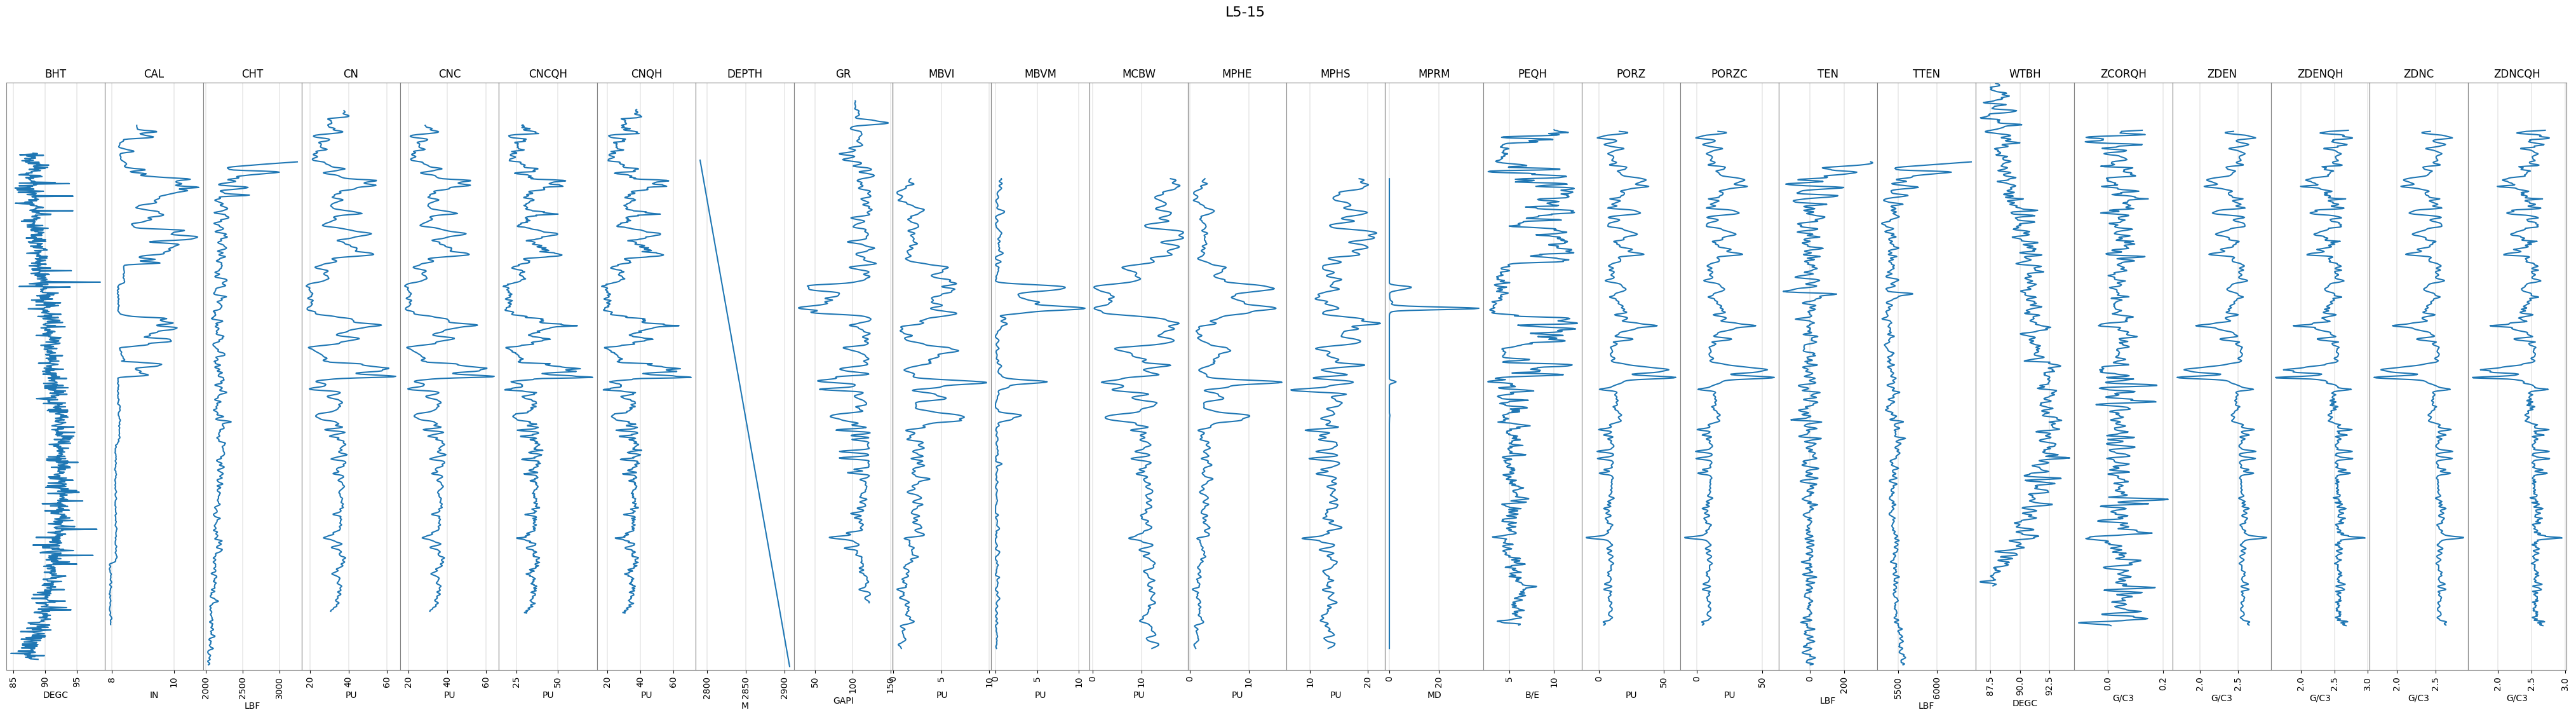

In [105]:
well.plot(extents='curves')
# we can also get only the curves that we require

####Welly to Pandas dataframe

In [106]:
df = well.df()
df.describe()

,BHT,CAL,CHT,CN,CNC,CNCQH,CNQH,DEPTH,GR,MBVI,...,PORZ,PORZC,TEN,TTEN,WTBH,ZCORQH,ZDEN,ZDENQH,ZDNC,ZDNCQH
count,931.0000000000,918.0000000000,925.0000000000,921.0000000000,894.0000000000,898.0000000000,926.0000000000,931.0000000000,923.0000000000,864.0000000000,...,908.0000000000,908.0000000000,925.0000000000,925.0000000000,924.0000000000,911.0000000000,908.0000000000,911.0000000000,908.0000000000,911.0000000000
mean,90.4971170784,8.5796165577,2188.2211600000,33.8257220413,33.3150693512,33.4302360802,33.9541447084,2848.7499957035,106.2693347779,2.6803680556,...,13.4281321586,13.9001156388,5.2898313514,5456.3247059459,90.4503593074,0.0432777168,2.4803854626,2.4855565313,2.4723116740,2.4774884742
std,1.9790790055,0.6772130063,119.6193802611,7.7859029881,7.5438748420,7.8608278447,8.0729880544,33.6126055585,17.7115176284,1.6291067799,...,8.8015001426,8.7558511002,53.7947922530,105.8106131629,1.6091182416,0.0395852778,0.1505090264,0.1551497074,0.1497199252,0.1543576111
min,84.6510000000,7.9270000000,2030.1130000000,18.0160000000,17.9130000000,16.6670000000,16.7560000000,2790.6250000000,28.4420000000,0.4070000000,...,-9.7590000000,-9.2180000000,-153.7030000000,5283.9020000000,86.6330000000,-0.1060000000,1.7000000000,1.6190000000,1.6990000000,1.6190000000
25%,88.9370000000,8.1340000000,2129.1740000000,29.2620000000,28.5872500000,28.5672500000,29.2530000000,2819.6875000000,102.3385000000,1.5712500000,...,8.4750000000,8.9620000000,-19.4900000000,5403.9260000000,89.1170000000,0.0240000000,2.4290000000,2.4325000000,2.4210000000,2.4240000000
50%,90.5690000000,8.2445000000,2172.1380000000,34.4570000000,34.2085000000,34.2070000000,34.5055000000,2848.7500000000,111.0120000000,2.1780000000,...,10.5405000000,11.0200000000,0.4620000000,5442.7880000000,90.7050000000,0.0420000000,2.5300000000,2.5310000000,2.5215000000,2.5230000000
75%,92.0330000000,8.9327500000,2219.5280000000,36.8300000000,36.6370000000,36.9070000000,37.0345000000,2877.8125000000,117.5930000000,3.2192500000,...,16.4210000000,16.9035000000,18.7620000000,5478.6140000000,91.6927500000,0.0655000000,2.5650000000,2.5690000000,2.5570000000,2.5610000000
max,98.6990000000,10.8060000000,3238.0620000000,64.5240000000,64.3770000000,71.5070000000,70.5960000000,2906.8750000000,146.8240000000,9.7150000000,...,59.0670000000,59.1000000000,366.5940000000,6442.0530000000,94.2010000000,0.2180000000,2.8770000000,2.9610000000,2.8680000000,2.9510000000


In [107]:
df.info()
# this shows us how many non null values are there

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 2772.75 to 2907.625
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BHT     931 non-null    float64
 1   CAL     918 non-null    float64
 2   CHT     925 non-null    float64
 3   CN      921 non-null    float64
 4   CNC     894 non-null    float64
 5   CNCQH   898 non-null    float64
 6   CNQH    926 non-null    float64
 7   DEPTH   931 non-null    float64
 8   GR      923 non-null    float64
 9   MBVI    864 non-null    float64
 10  MBVM    864 non-null    float64
 11  MCBW    864 non-null    float64
 12  MPHE    864 non-null    float64
 13  MPHS    864 non-null    float64
 14  MPRM    864 non-null    float64
 15  PEQH    911 non-null    float64
 16  PORZ    908 non-null    float64
 17  PORZC   908 non-null    float64
 18  TEN     925 non-null    float64
 19  TTEN    925 non-null    float64
 20  WTBH    924 non-null    float64
 21  ZCORQH  911 non-null    float64


# 2-D and 3-D plotting of data
Loading in a survey
file from a csv file and attaching it to
a welly well object. We can generate 2D and 3D plots using this.


####Importing Survey Data
Survey data is commonly measured at irregular intervals during the drilling process. It gives a snapshot of the measured depth, inclination and azimuth at the time of the survey. From this, we can calculated the True Vertical Depth, x-offset and y-offset from the origin point of the well.

---

*  The azimuth of a directional well is the deviation from the magnetic north
*  The inclination is the deviation from the vertical direction of the well.
---




In [108]:
#we can read the survey data using pandas dataframe
survey = pd.read_csv('/content/drive/My Drive/Well_location_visualisation/L05-15-Survey.csv')

In [109]:
survey
# Here we can see all the data we have in our survey file

,MD,INC,AZI,TVD,X-offset,Y-offset
0,0.00,0.00,0.00,0.00,0.00,0.00
1,89.30,0.00,0.00,89.30,0.00,0.00
2,142.10,2.31,323.48,142.09,-0.63,0.86
3,170.20,3.89,319.12,170.14,-1.59,2.03
4,197.90,5.86,315.60,197.74,-3.20,3.75
...,...,...,...,...,...,...
107,3121.82,22.52,202.44,3013.36,-271.20,-620.33
108,3149.93,23.35,203.30,3039.24,-275.46,-630.42
109,3178.92,23.82,204.05,3065.81,-280.12,-641.04
110,3192.32,24.12,204.96,3078.06,-282.38,-646.00


Welly requires the survey data to contain
* MD - measured depth
* INC - inclination
* AZI - azimuth.

This allows the library to calculate the TVD, X-offset and Y-offset.

We can subset the data by using the square brackets and passing in a list of the column names.

In [110]:
survey_subset = survey[['MD', 'INC', 'AZI']]

In [111]:
survey_subset

,MD,INC,AZI
0,0.00,0.00,0.00
1,89.30,0.00,0.00
2,142.10,2.31,323.48
3,170.20,3.89,319.12
4,197.90,5.86,315.60
...,...,...,...
107,3121.82,22.52,202.44
108,3149.93,23.35,203.30
109,3178.92,23.82,204.05
110,3192.32,24.12,204.96


#Adding Survey Data to Welly Well Data

Currently we have a pandas data
frame containing our survey data and a
welly well object containing our log
data so we need to join these up
together and bring them into the same
well object.

After the survey data has been loaded from a CSV file, we need to calculate our location parameters. By default welly is set to calculate these using the minimum curvature method, which is the most common and most accurate method for this purpose. More information can be found at https://petrowiki.spe.org/Calculation_methods_for_directional_survey



In [112]:
well.location.add_deviation(survey_subset.values)
 # adding deviation data to well | the method argument is set to mc by default

Now that the survey data has been loaded in, and attached to the well, we can call upon ```data.location.position``` to view the data.

The data is formatted as: X-offset, Y-offset and TVD.

In [113]:
# To check the first five rows of our survey data
well.location.position[:5]

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  89.3       ],
       [ -0.6333253 ,   0.8552655 , 142.08569704],
       [ -1.59422229,   2.03112298, 170.14372544],
       [ -3.19869524,   3.75201703, 197.74222054]])

We can extract each of the location parameters into variables by slicing up the array. This is done using square brakcets and selecting all rows using the colon (:) followed by the column within the array.

In [114]:
x_loc = well.location.position[:,0]
y_loc = well.location.position[:,1]
z_loc = well.location.position[:,2]
# This will give us exact location parameters array for ex
z_loc

array([   0.        ,   89.3       ,  142.08569704,  170.14372544,
        197.74222054,  225.68858529,  254.17872844,  282.83986178,
        311.3294853 ,  339.82739229,  368.42706739,  396.92691062,
        425.62638313,  454.22551155,  482.42473573,  511.12342097,
        539.72042719,  568.21483874,  597.00539705,  625.8900492 ,
        654.36614119,  683.22656973,  711.6691264 ,  740.00649462,
        767.54748074,  797.06893638,  825.36408467,  853.83548556,
        882.30553194,  910.5784206 ,  939.03148052,  967.35658945,
        995.56380403, 1023.95695144, 1052.22740711, 1080.54668678,
       1108.68959153, 1136.6589388 , 1164.87003188, 1192.91335907,
       1220.78632672, 1248.71483434, 1276.69724251, 1304.38501765,
       1332.02759325, 1359.48829109, 1386.59399864, 1413.47807554,
       1440.51055639, 1467.37758752, 1494.27990524, 1521.15255355,
       1547.94826077, 1574.81148851, 1601.67556214, 1628.46190115,
       1655.38744119, 1682.77094459, 1709.94467279, 1737.02953

In [115]:
# similar result can be obtained using
# well.location.tvd

###Creating Location 2D Plots
To understand the position of the well, we can draw three plots.
*  x and y offset gives us a top down view / map view of the well path.
*  x location versus TVD
*  y location versus TVD.
The next two plots show us how the well changes in the x and y location.

TVD can be a
positive number or a negative number
depending on how it's calculated
as we're looking at depth
down below the surface we need to invert
our y-axis on ax2 and ax3 so that
we have a better understanding of our
well path with relation to TVD.

<ipython-input-116-4d2f8a37a3a5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))


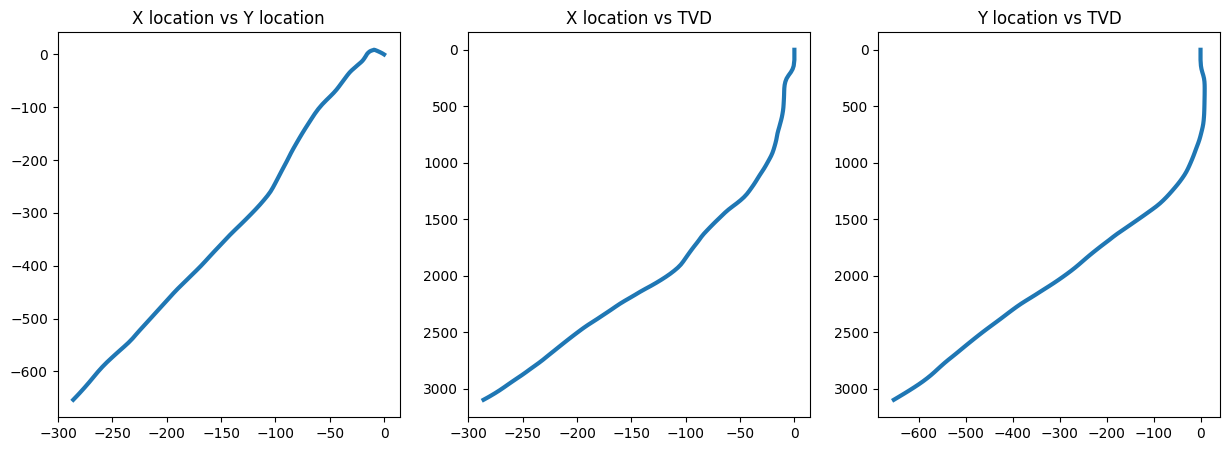

In [116]:
fig, ax = plt.subplots(figsize=(15,5))   # setting figure and axis object
# We need three seperate axes for three seperate subplot
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

# Now inputting what we need to plot
ax1.plot(x_loc, y_loc, lw = 3)
ax1.set_title('X location vs Y location')
ax2.plot(x_loc, z_loc, lw = 3)
ax2.set_title('X location vs TVD')
ax2.invert_yaxis()
ax3.plot(y_loc, z_loc, lw = 3)
ax3.set_title('Y location vs TVD')
ax3.invert_yaxis()

We can add markers to our plot to show the starting location (black square, s for square(s)) and the end location (red star(*)) of the well.

<ipython-input-117-206cce9f49e4>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))


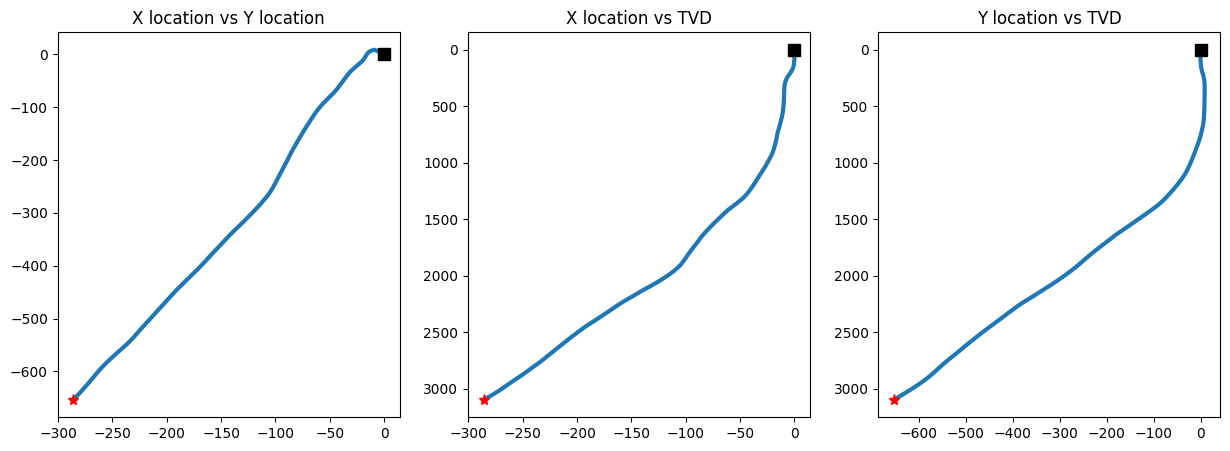

In [117]:
fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))
# X vs Y
ax1.plot(x_loc, y_loc, lw = 3)
ax1.plot(x_loc[0], y_loc[0], marker = 's', color = 'black', ms=8)
ax1.plot(x_loc[-1], y_loc[-1], marker = '*', color = 'red', ms=8)
ax1.set_title('X location vs Y location')

# X vs TVD
ax2.plot(x_loc, z_loc, lw = 3)
ax2.plot(x_loc[0], z_loc[0], marker = 's', color = 'black', ms=8)
ax2.plot(x_loc[-1], z_loc[-1], marker = '*', color = 'red', ms=8)
ax2.set_title('X location vs TVD')
ax2.invert_yaxis()

# Y vs TVD
ax3.plot(y_loc, z_loc, lw = 3)
ax3.plot(y_loc[0], z_loc[0], marker = 's', color = 'black', ms=8)
ax3.plot(y_loc[-1], z_loc[-1], marker = '*', color = 'red', ms=8)
ax3.set_title('Y location vs TVD')
ax3.invert_yaxis()

#### Comparing our plot against original survey data
The survey file we have contains the location parameters and TVD, so we can do a quick check with what Welly has calculated and the ones contained within the CSV file.
For this we will change the width and color of the plot.

<ipython-input-118-991c1f02caee>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))


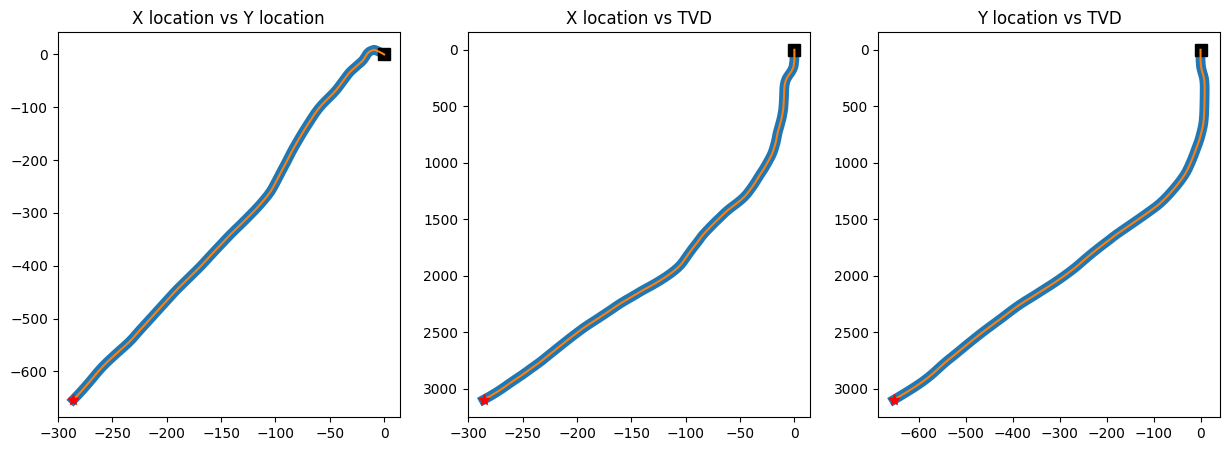

In [118]:
fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))
# X vs Y
ax1.plot(x_loc, y_loc, lw = 7)  #updating the line width so we can see the lines
ax1.plot(x_loc[0], y_loc[0], marker = 's', color = 'black', ms=8)
ax1.plot(survey['X-offset'], survey['Y-offset'])  # adding original survey data
ax1.plot(x_loc[-1], y_loc[-1], marker = '*', color = 'red', ms=8)
ax1.set_title('X location vs Y location')

# X vs TVD
ax2.plot(x_loc, z_loc, lw = 7)
ax2.plot(x_loc[0], z_loc[0], marker = 's', color = 'black', ms=8)
ax2.plot(survey['X-offset'], survey['TVD'])
ax2.plot(x_loc[-1], z_loc[-1], marker = '*', color = 'red', ms=8)
ax2.set_title('X location vs TVD')
ax2.invert_yaxis()

# Y vs TVD
ax3.plot(y_loc, z_loc, lw = 7)
ax3.plot(y_loc[0], z_loc[0], marker = 's', color = 'black', ms=8)
ax3.plot(survey['Y-offset'], survey['TVD'])
ax3.plot(y_loc[-1], z_loc[-1], marker = '*', color = 'red', ms=8)
ax3.set_title('Y location vs TVD')
ax3.invert_yaxis()

## Creating 3D Plot of well

Rather than viewing the data in two dimensions, we can view it in three dimensions using matplotlib. But first we have to calculate continuous data. This is done by using `location.trajectory()`.

We need to create a trajectory of regularly sampled data points.

 Here we can provide a datum, i.e the UTM(The Universal Transverse Mercator (UTM) is a map projection system for assigning coordinates to locations on the surface of the Earth) co-ordinates of the well location at surface, and a vertical offset.


![picture](https://drive.google.com/uc?export=view&id=17kNCiYP0jXE-J-7ANN7IKY7sHgyA1fAf)

In [123]:
#Creating a new variable called location data
location_data = well.location.trajectory(datum = [589075.56, 5963534.91, 47.5], elev = False)
#if elevation is set true the values will be positive upwards, by default its true
#47.5 metres is our elevation which is kelly bushing

In [122]:
# creating individual variables for location data this will give us continuous array of location data
xs = location_data[:,0]
ys = location_data[:,1]
zs = location_data[:,2]

In [124]:
zs

array([  47.52654446,   50.75387201,   53.98038627,   57.20610207,
         60.43103429,   63.65519779,   66.87860743,   70.10127807,
         73.32322456,   76.54446177,   79.76500457,   82.98486781,
         86.20406634,   89.42261505,   92.64052877,   95.85782238,
         99.07451074,  102.2906087 ,  105.50613112,  108.72109288,
        111.93550882,  115.14939381,  118.36276272,  121.57563039,
        124.78801169,  127.99992149,  131.21137464,  134.422386  ,
        137.63297043,  140.8431428 ,  144.05291797,  147.26231079,
        150.47133613,  153.68000885,  156.88834381,  160.09635587,
        163.30405988,  166.51147072,  169.71860324,  172.9254723 ,
        176.13209277,  179.3384795 ,  182.54464735,  185.75061119,
        188.95638588,  192.16198627,  195.36742723,  198.57272362,
        201.7778903 ,  204.98294213,  208.18789397,  211.39276068,
        214.59755713,  217.80229816,  221.00699865,  224.21167346,
        227.41633744,  230.62100546,  233.82569237,  237.03041

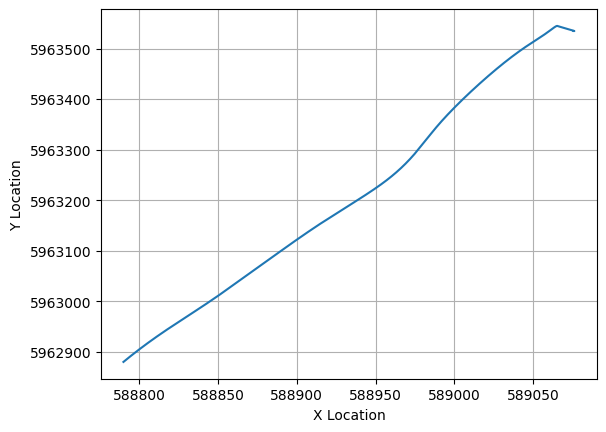

In [126]:
#We can create a simple 2-D map plot of our data by plotting our x's and y's against each other
#just to be sure that our data has been plotted correctly
plt.plot(xs,ys)
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.ticklabel_format(style='plain') #This line sets the tick labels (the numbers along the x and y axes) to a plain style, ensuring they are displayed in standard numerical format without default scientific notation.
plt.grid()

# Now the x and y location are updated relative to well path location and the plot is same as before

In [134]:
# Enable 3D Plotting

from mpl_toolkits.mplot3d import Axes3D
!pip install ipympl
%matplotlib widget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.6 MB/s eta 0:00:00


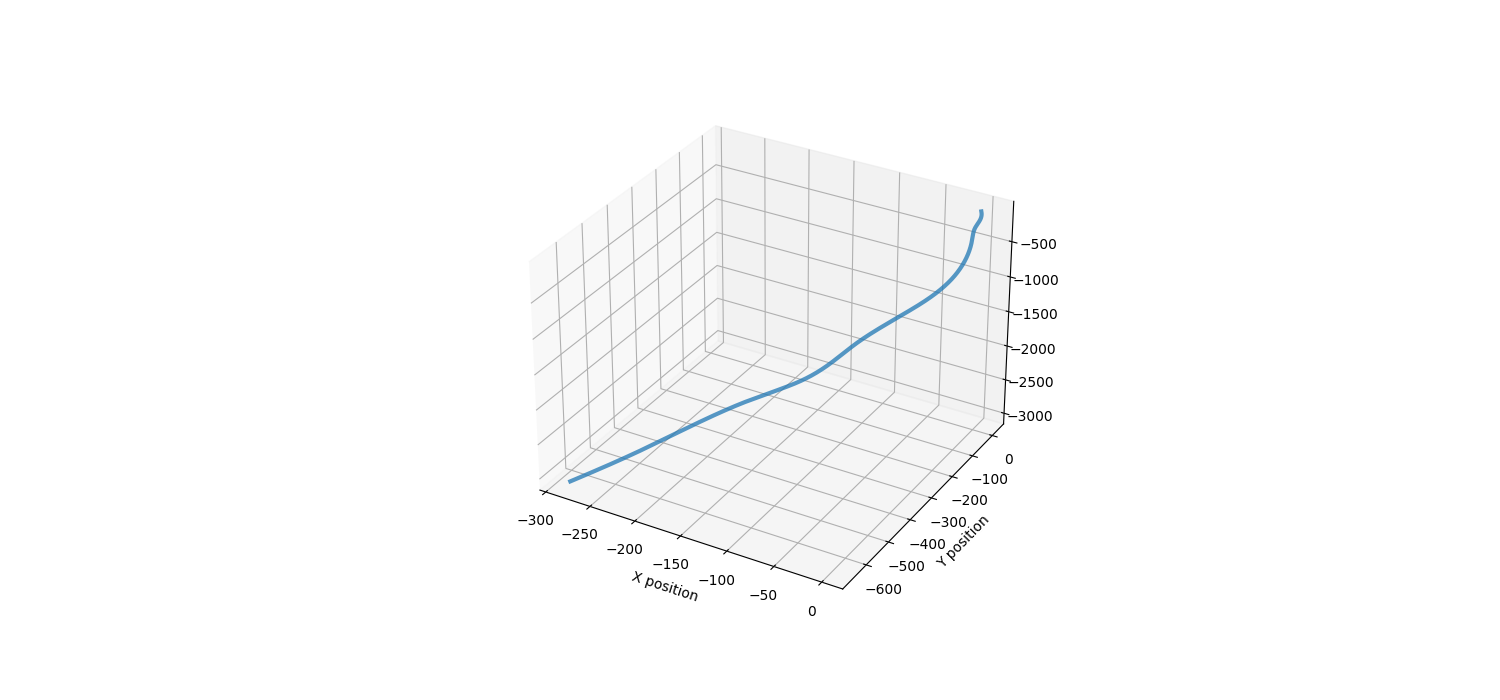

In [138]:
well.location.plot_3d()

In [137]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

Welly library does come with its own 3D plot so we
don't have to set anything up but when
we run this
we can see that it is set to the x
position and the y position within our
original data however if we want to see our x and y
coordinates so we need to create a
slightly different plot.

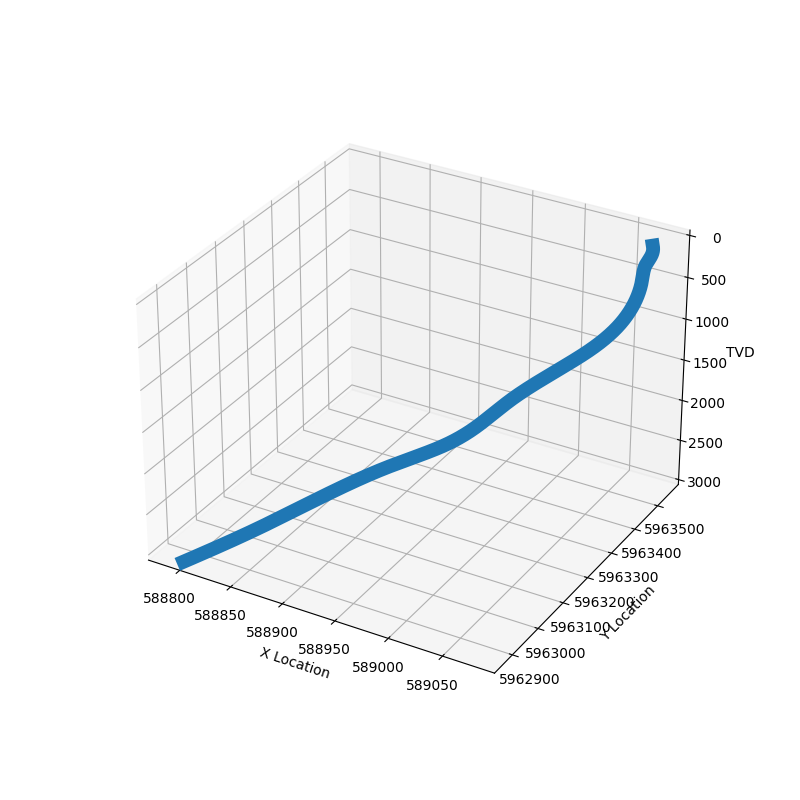

In [140]:
fig = plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, lw=10)
ax.set_zlim(3000,0)  # 3000 is our deepest depth and 0 is shallowest

ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_zlabel('TVD')
plt.ticklabel_format(style='plain')
plt.show()

Hence we obtained a 3d interactive figure of well path. Rather than creating
three separate plots in two dimensions
we now can move this around to gain a
better understanding of our well path.

This project effectively showcases the capabilities of the Welly library for visualizing well log data through advanced data science techniques. By integrating .las and .csv files, we generated detailed 2D and interactive 3D plots to visualize the well path comprehensively.

The 3D plotting, in particular, provides an immersive way to understand the wellbore's trajectory, highlighting the differences between true vertical depth (TVD) and measured depth (MD). This interactive visualization is crucial for accurately analyzing well data, aiding in better decision-making for well completion and casing settings.

Utilizing Python's powerful data science tools, this project illustrates how sophisticated visualizations can enhance our understanding of geological data, making Welly an essential resource for geoscientists and petroleum engineers.

